In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Подготовка данных 

Проверим код на налчие неверных данных, например постых полей:

In [15]:
salary_data.info()
salary_data[salary_data.isnull().any(axis=1)]
salary_data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Оказалось 6 полей из 6704 с неверными данными. Удаляем их третьей строкой

В графе образования бывает встречается phD, а бывает PhD. Надо сделать один вариант, например PhD. То же касается и других уровней образования:

In [16]:
salary_data['Education Level'].value_counts()

Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [7]:
def UnifyEducationLevel(s):
    for e in ['Bachelor', 'Master', 'PhD']:
        if e.lower() in s.lower(): return e
    return s
        
salary_data['Education Level'] = salary_data['Education Level'].apply(UnifyEducationLevel)
salary_data['Education Level'].value_counts()

Bachelor       3021
Master         1860
PhD            1369
High School     448
Name: Education Level, dtype: int64

Данные подготовлены, теперь можно анализировать данные

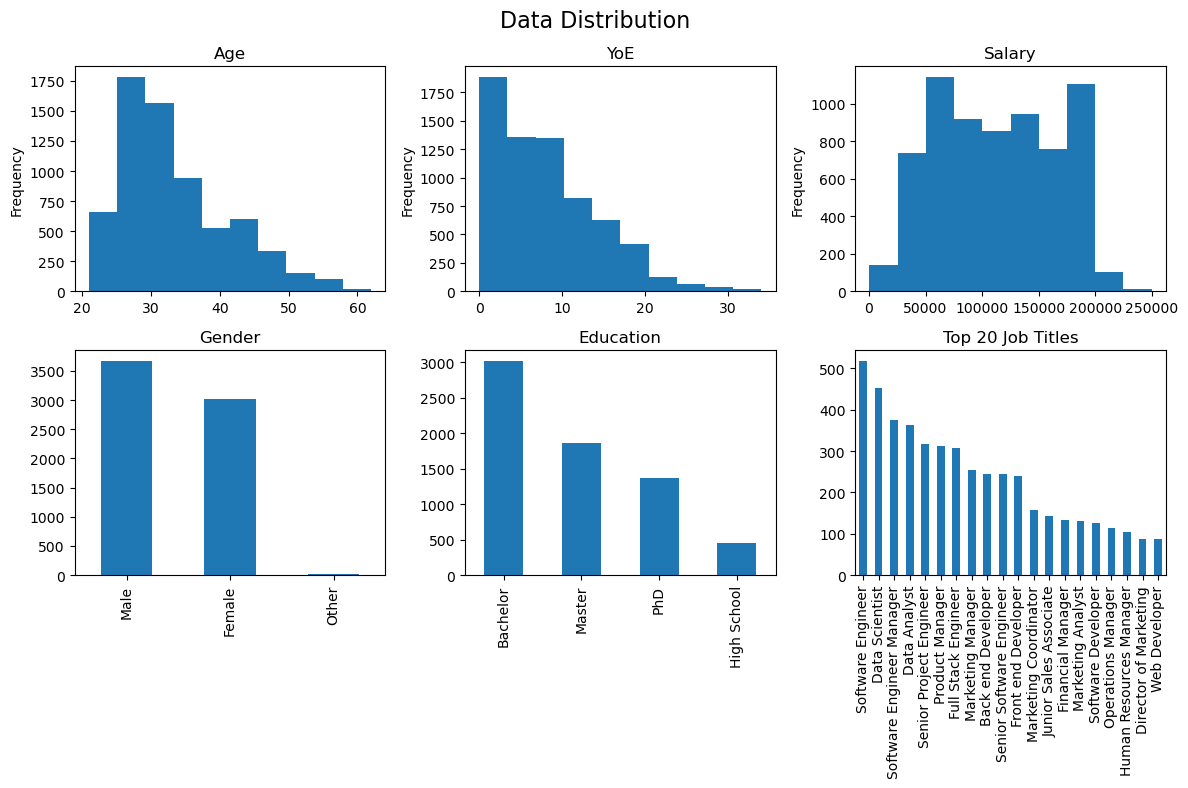

In [8]:
salary_data['Age'] = salary_data['Age'].astype('int')
salary_data['Years of Experience'] = salary_data['Years of Experience'].astype('int')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

salary_data['Age'].plot(kind='hist', ax=axes[0, 0], title='Age')
salary_data['Years of Experience'].plot(kind='hist', ax=axes[0, 1], title='YoE')
salary_data['Salary'].plot(kind='hist', ax=axes[0, 2], title='Salary')
salary_data['Gender'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Gender')
salary_data['Education Level'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Education')
salary_data['Job Title'].value_counts()[:20].plot(kind='bar', ax=axes[1, 2], title='Top 20 Job Titles')

fig.suptitle('Data Distribution', fontsize=16)
plt.tight_layout()

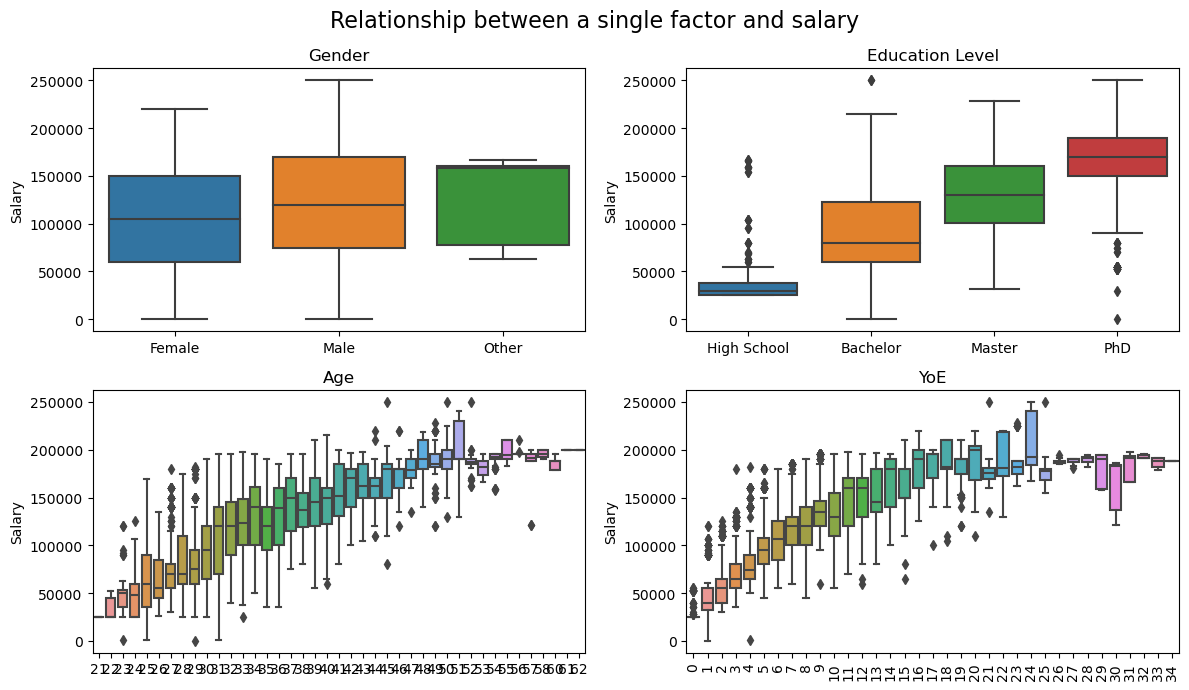

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

xfactor = "Gender"
g = sns.boxplot(x=xfactor, y="Salary", data=salary_data, ax=axes[0, 0], order=salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title='Gender', xlabel=None)

xfactor = "Education Level"
g = sns.boxplot(x=xfactor, y="Salary", data=salary_data, ax=axes[0, 1], order=salary_data.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(title='Education Level', xlabel=None)

xfactor = "Age"
plt.xticks(rotation=90)
g = sns.boxplot(x=xfactor, y="Salary", ax=axes[1, 0], data=salary_data)
g.set(title='Age', xlabel=None)

xfactor = "Years of Experience"
plt.xticks(rotation=90)
g = sns.boxplot(x=xfactor, y="Salary", ax=axes[1, 1], data=salary_data)
g.set(title='YoE', xlabel=None)

fig.suptitle('Relationship between a single factor and salary', fontsize=16)
plt.tight_layout()

Text(0.5, 1.0, 'Most Popular 20 Jobs in the Survey & the Salary Range')

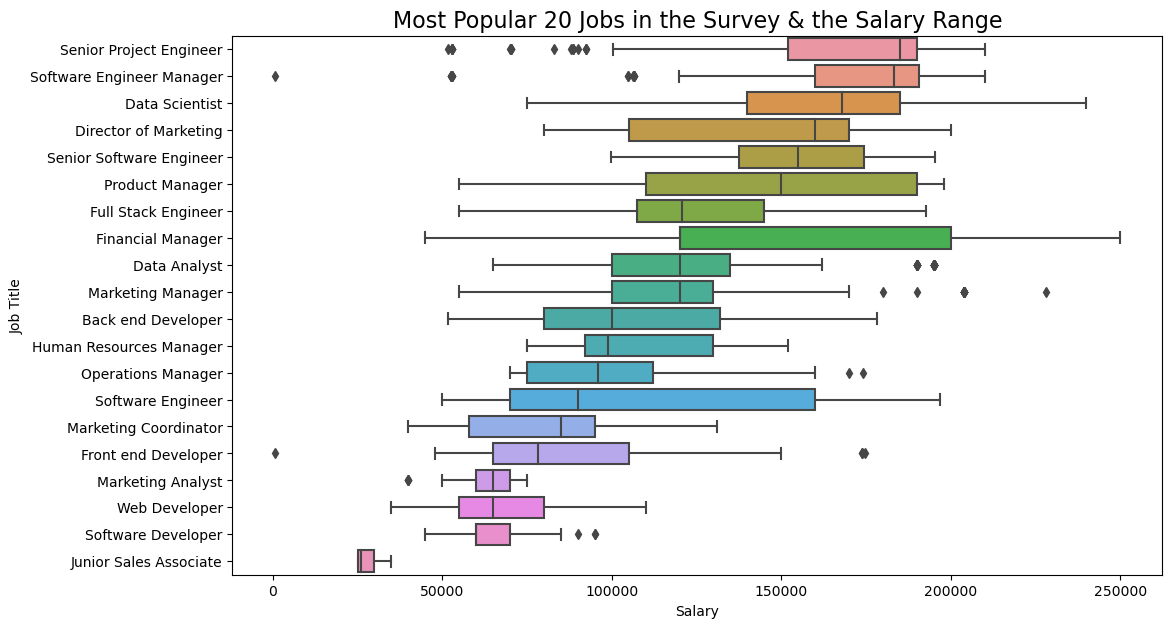

In [10]:
num_pop_jobs = 20
pop_jobs = salary_data['Job Title'].value_counts()[:num_pop_jobs].index
pop_jobs_data = salary_data[salary_data['Job Title'].isin(pop_jobs)]

plt.figure(figsize=(12, 7))
sns.boxplot(y="Job Title", x="Salary", data=pop_jobs_data, 
            order=pop_jobs_data.groupby('Job Title')['Salary'].median().sort_values(ascending=False).index)
plt.title(f'Most Popular {num_pop_jobs} Jobs in the Survey & the Salary Range', fontsize=16)

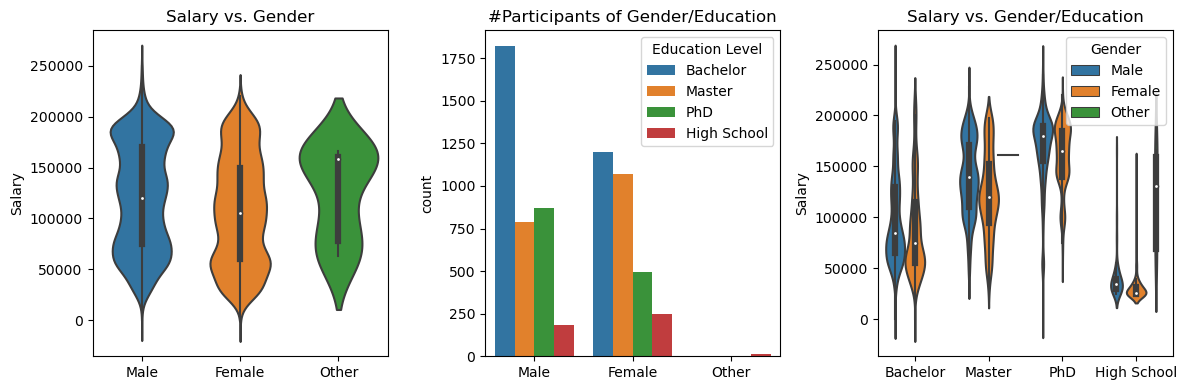

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

g = sns.violinplot(x='Gender', y='Salary', data=salary_data, ax=axes[0])
g.set(title='Salary vs. Gender', xlabel=None)

g = sns.countplot(x='Gender', hue='Education Level', data=salary_data, ax=axes[1])
g.set(title='#Participants of Gender/Education', xlabel=None)

g = sns.violinplot(x='Education Level', y='Salary', hue='Gender', data=salary_data, ax=axes[2])
g.set(title='Salary vs. Gender/Education', xlabel=None)
plt.tight_layout()

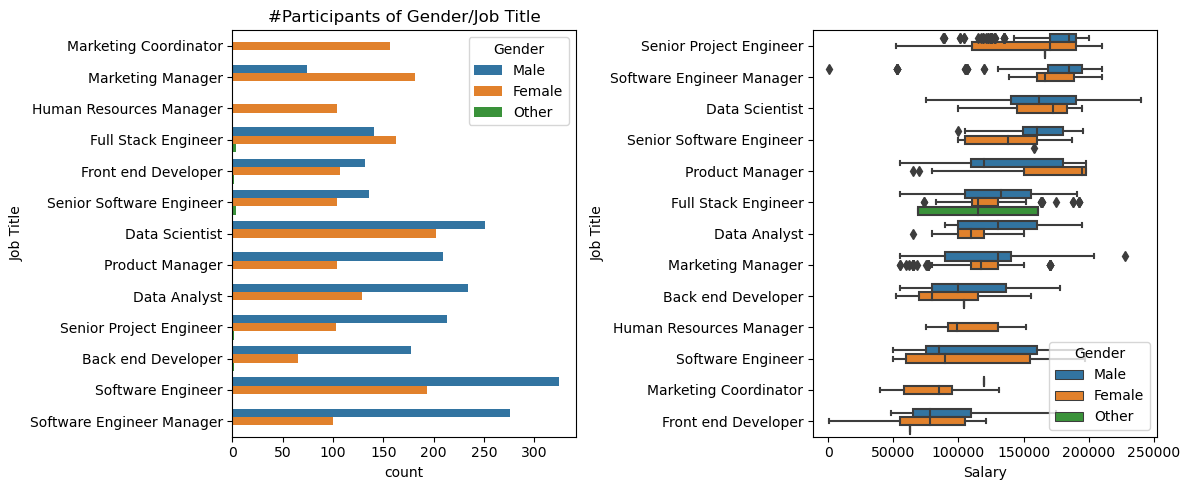

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# find the most popular jobs for both male and female
male_pop_jobs = salary_data[salary_data['Gender']=='Male']['Job Title'].value_counts()[:10].index
female_pop_jobs = salary_data[salary_data['Gender']=='Female']['Job Title'].value_counts()[:10].index
t = set(list(male_pop_jobs)+list(female_pop_jobs))

# calculate the #participants and sort the jobs in the order of different of #participants
job_count_diff = []
for e in t:
    job_data = salary_data[salary_data['Job Title']==e]
    dc = job_data[job_data['Gender']=='Male'].shape[0] - job_data[job_data['Gender']=='Female'].shape[0]
    job_count_diff.append([e, dc])
job_count_diff.sort(key = lambda x: x[1])

# plot the bar chart for #participants
both_pop_jobs_data = salary_data[salary_data['Job Title'].isin(t)]
g = sns.countplot(y='Job Title', hue='Gender', data=both_pop_jobs_data, order=[e[0] for e in job_count_diff], ax=axes[0])
g.set(title='#Participants of Gender/Job Title')

# -------------

# plot the box plot for the salary
high_pay_jobs = both_pop_jobs_data.groupby('Job Title')['Salary'].median().sort_values(ascending=False).index
sns.boxplot(y="Job Title", x="Salary", data=both_pop_jobs_data, order=high_pay_jobs, hue='Gender', ax=axes[1])
plt.tight_layout()